# Presentation 1 Group 9 Analysis

- EV vehicles.
  
---

### Library Imports & Loads of Files

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns


# File to Load - 
census_df = Path('Resources/census_data.csv')  # UPDATE http://www.ecdms.energy.ca.gov/elecbyCounty.aspx
vehicle_type_by_zipcode_2020 = Path('Resources/vehicle_type_by_zipcode_2020.csv')
vehicle_type_by_zipcode_2021 = Path('Resources/vehicle_type_by_zipcode_2021.csv')
vehicle_type_by_zipcode_2022 = Path('Resources/vehicle_type_by_zipcode_2022.csv')
vehicle_type_by_zipcode_2022


census_df = pd.read_csv(census_df)
vehicle_type_by_zipcode_2020 = pd.read_csv(vehicle_type_by_zipcode_2020, low_memory=False)
vehicle_type_by_zipcode_2021 = pd.read_csv(vehicle_type_by_zipcode_2021, low_memory=False)
vehicle_type_by_zipcode_2022 = pd.read_csv(vehicle_type_by_zipcode_2022, low_memory=False)

#### DMV DATA 

In [2]:
# Perform initial review of DMV dataframe

vehicle_type_by_zipcode_2022

,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,1/1/2022,90000,2020,Gasoline,OTHER/UNK,Light,1
1,1/1/2022,90000,2022,Gasoline,OTHER/UNK,Light,1
2,1/1/2022,90000,<2008,Gasoline,OTHER/UNK,Heavy,22
3,1/1/2022,90000,<2008,Gasoline,OTHER/UNK,Light,20
4,1/1/2022,90000,<2008,Gasoline,OTHER/UNK,Unk,12
...,...,...,...,...,...,...,...
722460,1/1/2022,OOS,<2008,Flex-Fuel,CHRYSLER,Light,24
722461,1/1/2022,OOS,<2008,Flex-Fuel,CHRYSLER,Unk,26
722462,1/1/2022,OOS,<2008,Flex-Fuel,MAZDA,Light,14
722463,1/1/2022,OOS,<2008,Flex-Fuel,MERCURY,Light,20


In [3]:
# Generate battery vehcile DMV dataframe 
# Determine the total number of vehicles with battery for years 2020
# Cleanes dataframe
# Match Census dataframe

battery_2020 = vehicle_type_by_zipcode_2020.loc[vehicle_type_by_zipcode_2020['Fuel'] == 'Battery Electric'] # locate battety vehicles
battery_2020 = battery_2020.drop(columns=['Model Year', 'Fuel', 'Make', 'Duty']) # drop unnecessary series
battery_2020 = battery_2020[battery_2020['Zip Code'] != 'OOS'] # cleanse by dropping "OOS" zip codes  
battery_2020 = battery_2020.replace('1/1/2020', 2020) # replacing Date to match DMV data
battery_2020 = battery_2020.sort_values('Zip Code') # sort on Zip Code
vehicle_count_2020 = battery_2020['Vehicles'].sum() # add all battery vechiles 2020
print('#############################')
print('EV count for 2020 is :', vehicle_count_2020)
print('#############################','\n\n')
battery_2020

#############################
EV count for 2020 is : 302841
############################# 




,Date,Zip Code,Vehicles
565720,2020,90000,4
442176,2020,90001,3
307116,2020,90001,1
483884,2020,90001,6
505993,2020,90001,2
...,...,...,...
399652,2020,98922,1
399653,2020,99205,1
399654,2020,99223,1
485315,2020,99502,1


In [4]:
# Repeat preceding cell to determine the total number of vehicles with battery for years 2021

battery_2021 = vehicle_type_by_zipcode_2021.loc[vehicle_type_by_zipcode_2021['Fuel'] == 'Battery Electric']
battery_2021 = battery_2021.drop(columns=['Model Year', 'Fuel', 'Make', 'Duty'])
battery_2021 = battery_2021[battery_2021['Zip Code'] != 'OOS']
battery_2021 = battery_2021.replace('1/1/2021', 2021)
battery_2021 = battery_2021.sort_values('Zip Code')
vehicle_count_2021 = battery_2021['Vehicles'].sum()

print('#############################')
print('EV count for 2021 is :', vehicle_count_2021)
print('#############################','\n')
battery_2021

#############################
EV count for 2021 is : 371134
############################# 



,Date,Zip Code,Vehicles
248317,2021,90001,2
545279,2021,90001,13
156594,2021,90001,2
400089,2021,90001,3
348520,2021,90001,3
...,...,...,...
412381,2021,98922,1
412392,2021,99019,1
412394,2021,99021,1
462557,2021,99801,1


In [5]:
# Repeat preceding cells to determine the total number of vehicles with battery for years 2022
battery_2022 = vehicle_type_by_zipcode_2022.loc[vehicle_type_by_zipcode_2022['Fuel'] == 'Battery Electric']
battery_2022 = battery_2022.drop(columns=['Model Year', 'Fuel', 'Make', 'Duty'])
battery_2022 = battery_2022[battery_2022['Zip Code'] != 'OOS']
battery_2022 = battery_2022.replace('1/1/2022', 2022)
battery_2022 = battery_2022.sort_values('Zip Code')
vehicle_count_2022 = battery_2022['Vehicles'].sum()

print('#############################')
print('EV count for 2022 is :', vehicle_count_2022)
print('#############################','\n')
battery_2022

#############################
EV count for 2022 is : 520345
############################# 



,Date,Zip Code,Vehicles
141,2022,90001,1
488,2022,90001,1
474,2022,90001,16
473,2022,90001,2
441,2022,90001,1
...,...,...,...
719552,2022,98584,1
719786,2022,98663,1
720105,2022,98944,1
720203,2022,99033,1


#### CENSUS DATA 

In [6]:
# Generate Census dataframe
# Determine the total number of zip codes for neighborhoods for California
# Cleanes data
# Match DMV data

# Create dataframe for years 2020, 2021, and 2022
census_df_2020 = census_df.loc[(census_df['Year'] == 2020)]
census_df_2021 = census_df.loc[census_df['Year'] == 2021]
census_df_2022 = census_df.loc[census_df['Year'] == 2022]
census_df_2020_2022 = census_df.loc[(census_df['Year'] == 2020) | (census_df['Year'] == 2021) | (census_df['Year'] == 2022)]

# Change zip code to match DMV data for years 2020, 2021, and 2022
census_df_2020 = census_df_2020.rename(columns={'Zipcode': 'Zip Code'})
census_df_2021 = census_df_2021.rename(columns={'Zipcode': 'Zip Code'})
census_df_2022 = census_df_2022.rename(columns={'Zipcode': 'Zip Code'})
census_df_2020_2022 = census_df_2020_2022.rename(columns={'Zipcode': 'Zip Code'})

# Drop unnecessary series
census_df_2020 = census_df_2020.drop(columns=['Population', 'state_abbr', 'state_fips', 'state', 'city'])
census_df_2021 = census_df_2021.drop(columns=['Population', 'state_abbr', 'state_fips', 'state', 'city'])
census_df_2022 = census_df_2022.drop(columns=['Population', 'state_abbr', 'state_fips', 'state', 'city'])
census_df_2020_2022 = census_df_2020_2022.drop(columns=['Population', 'state_abbr', 'state_fips', 'state', 'city'])

# Match Zip Code of DMV data
census_df_2020 = census_df_2020.rename(columns={'Zipcode': 'Zip Code'})
census_df_2021 = census_df_2021.rename(columns={'Zipcode': 'Zip Code'})
census_df_2022 = census_df_2022.rename(columns={'Zipcode': 'Zip Code'})
census_df_2020_2022 = census_df_2020_2022.rename(columns={'Zipcode': 'Zip Code'})

# Match County of DMV data
census_df_2020 = census_df_2020.rename(columns={'county': 'County'})
census_df_2021 = census_df_2021.rename(columns={'county': 'County'})
census_df_2022 = census_df_2022.rename(columns={'county': 'County'})
census_df_2020_2022 = census_df_2020_2022.rename(columns={'county': 'County'})

# Concatenate the DataFrames to create census dataframe for merging with DMV dataframe
census_df_2020_2022 = pd.concat([census_df_2020, census_df_2021, census_df_2022], ignore_index=True)
census_df_2020_2022.reset_index(drop=True, inplace=True)
census_df_2020_2022

,Zip Code,Household Income,Year,County
0,90001,48011.0,2020,Los Angeles
1,90002,42245.0,2020,Los Angeles
2,90003,42220.0,2020,Los Angeles
3,90004,52775.0,2020,Los Angeles
4,90005,42398.0,2020,Los Angeles
...,...,...,...,...
4285,96145,120714.0,2022,Placer
4286,96146,112500.0,2022,Placer
4287,96148,96786.0,2022,Placer
4288,96150,76980.0,2022,El Dorado


In [7]:
# Determine boundaries for upper-, middle- and lower-income levels
# Define boundaries as 27% and 75% quartiles for 2020

mean_2020 = census_df_2020['Household Income'].mean()
quartile_25_2020 = census_df_2020['Household Income'].quantile([0.25])
quartile_75_2020 = census_df_2020['Household Income'].quantile([0.75])
print('####################################################################')
#print('mean', mean_2020)
print('The 25% quartile of Household Income for 2020 is: ', quartile_25_2020)
print('The 75% quartile of Household Income for 2020 is: ', quartile_75_2020)
print('####################################################################','\n')
print('####################################################################')

# Define boundaries as 27% and 75% quartiles for 2021
mean_2021 = census_df_2021['Household Income'].mean()
quartile_25_2021 = census_df_2021['Household Income'].quantile([0.25])
quartile_75_2021 = census_df_2021['Household Income'].quantile([0.75])
#print('mean', mean_2021)
print('The 25% quartile of Household Income for 2021 is: ', quartile_25_2021)
print('The 75% quartile of Household Income for 2021 is: ', quartile_75_2021)
print('####################################################################','\n')
print('####################################################################')

# Define boundaries as 27% and 75% quartiles for 2022
mean_2022 = census_df_2022['Household Income'].mean()
quartile_25_2022 = census_df_2022['Household Income'].quantile([0.25])
quartile_75_2022 = census_df_2022['Household Income'].quantile([0.75])
#print('mean', mean_2022)
print('The 25% quartile of Household Income for 2022 is: ',quartile_25_2022)
print('The 75% quartile of Household Income for 2022 is: ',quartile_75_2022)
print('####################################################################''\n')

####################################################################
The 25% quartile of Household Income for 2020 is:  0.25    53870.75
Name: Household Income, dtype: float64
The 75% quartile of Household Income for 2020 is:  0.75    96681.0
Name: Household Income, dtype: float64
#################################################################### 

####################################################################
The 25% quartile of Household Income for 2021 is:  0.25    58177.0
Name: Household Income, dtype: float64
The 75% quartile of Household Income for 2021 is:  0.75    104462.75
Name: Household Income, dtype: float64
#################################################################### 

####################################################################
The 25% quartile of Household Income for 2022 is:  0.25    63959.75
Name: Household Income, dtype: float64
The 75% quartile of Household Income for 2022 is:  0.75    112068.0
Name: Household Income, dtype: float64
##########

In [8]:
# Merge DMV and Census dataframes 
# Determine total number of EVs in California for 2022, 2021, and 2022 

# Change Zip Code data to strings
census_df_2020['Zip Code'] = census_df_2020['Zip Code'].apply(str) 
census_df_2021['Zip Code'] = census_df_2021['Zip Code'].apply(str)
census_df_2022['Zip Code'] = census_df_2022['Zip Code'].apply(str)

# Merge on Zip Code
merge_2020 = pd.merge(census_df_2020, battery_2020, how='left', on=['Zip Code'], sort=True)
merge_2021 = pd.merge(census_df_2021, battery_2021, how='left', on=['Zip Code'], sort=True)
merge_2022 = pd.merge(census_df_2022, battery_2022, how='left', on=['Zip Code'], sort=True)

# Drop NaN values arising from merge
merge_2020 = merge_2020.dropna(subset=['Date', 'Vehicles'])
merge_2021 = merge_2021.dropna(subset=['Date', 'Vehicles'])
merge_2022 = merge_2022.dropna(subset=['Date', 'Vehicles'])

# Merge on DMV and Census dataframes
merge_vehicle_count_2020 = merge_2020['Vehicles'].sum()
merge_vehicle_count_2021 = merge_2021['Vehicles'].sum()
merge_vehicle_count_2022 = merge_2022['Vehicles'].sum()

print('##########################################################')
print('The total vehicle count after merge for 2020 is ', merge_vehicle_count_2020)
print('The total vehicle count after merge for 2021 is ', merge_vehicle_count_2021)
print('The total vehicle count after merge for 2022 is ', merge_vehicle_count_2022)
print('##########################################################','\n')

##########################################################
The total vehicle count after merge for 2020 is  274385.0
The total vehicle count after merge for 2021 is  335157.0
The total vehicle count after merge for 2022 is  468753.0
########################################################## 



In [9]:
# Determine total vehicles counts per zip codes for years 2020, 2021, and 2022
# Use Zip Codes to define neighborhoods 

total_vehicle_count_by_zipcode_2020_df = merge_2020.groupby(['Zip Code', 'Household Income', 'County'], as_index=False, sort=True)['Vehicles'].sum()
total_vehicle_count_by_zipcode_2021_df = merge_2021.groupby(['Zip Code', 'Household Income', 'County'], as_index=False, sort=True)['Vehicles'].sum()
total_vehicle_count_by_zipcode_2022_df = merge_2022.groupby(['Zip Code', 'Household Income', 'County'], as_index=False, sort=True)['Vehicles'].sum()

In [10]:
# Determine total vehicles counts per 25% and 75% quartiles for years 2020, 2021, and 2022

total_vehicle_count_df_2020_75 = total_vehicle_count_by_zipcode_2020_df.loc[(total_vehicle_count_by_zipcode_2020_df['Household Income'] > int(quartile_75_2020))]
total_vehicle_count_df_2020_25 = total_vehicle_count_by_zipcode_2020_df.loc[(total_vehicle_count_by_zipcode_2020_df['Household Income'] < int(quartile_25_2020))]

total_vehicle_count_df_2021_75 = total_vehicle_count_by_zipcode_2021_df.loc[(total_vehicle_count_by_zipcode_2021_df['Household Income'] > int(quartile_75_2021))]
total_vehicle_count_df_2021_25 = total_vehicle_count_by_zipcode_2021_df.loc[(total_vehicle_count_by_zipcode_2021_df['Household Income'] < int(quartile_25_2021))]

total_vehicle_count_df_2022_75 = total_vehicle_count_by_zipcode_2022_df.loc[(total_vehicle_count_by_zipcode_2022_df['Household Income'] > int(quartile_75_2022))]
total_vehicle_count_df_2022_25 = total_vehicle_count_by_zipcode_2022_df.loc[(total_vehicle_count_by_zipcode_2022_df['Household Income'] < int(quartile_25_2022))]

total_vehicle_count_df_2020_75.reset_index(drop=True, inplace=True)
total_vehicle_count_df_2020_25.reset_index(drop=True, inplace=True)
total_vehicle_count_df_2021_75.reset_index(drop=True, inplace=True)
total_vehicle_count_df_2021_25.reset_index(drop=True, inplace=True)
total_vehicle_count_df_2022_75.reset_index(drop=True, inplace=True)
total_vehicle_count_df_2022_25.reset_index(drop=True, inplace=True)
total_vehicle_count_df_2022_25

C:\Users\jhaug\AppData\Local\Temp\ipykernel_14120\1860780555.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_vehicle_count_df_2020_75 = total_vehicle_count_by_zipcode_2020_df.loc[(total_vehicle_count_by_zipcode_2020_df['Household Income'] > int(quartile_75_2020))]
C:\Users\jhaug\AppData\Local\Temp\ipykernel_14120\1860780555.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_vehicle_count_df_2020_25 = total_vehicle_count_by_zipcode_2020_df.loc[(total_vehicle_count_by_zipcode_2020_df['Household Income'] < int(quartile_25_2020))]
C:\Users\jhaug\AppData\Local\Temp\ipykernel_14120\1860780555.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_vehicle_count_df_2021_75 = total_vehicle_count

,Zip Code,Household Income,County,Vehicles
0,90001,57698.0,Los Angeles,52.0
1,90002,54221.0,Los Angeles,60.0
2,90003,51275.0,Los Angeles,63.0
3,90004,58420.0,Los Angeles,643.0
4,90005,49226.0,Los Angeles,286.0
...,...,...,...,...
307,96107,43800.0,Mono,2.0
308,96122,53764.0,Plumas,9.0
309,96134,49327.0,Siskiyou,2.0
310,96137,59280.0,Lassen,7.0


In [11]:
# Determine vehicle count per quartile for each county

vehicle_count_by_county_df_2020_75 = total_vehicle_count_df_2020_75.groupby(['County'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2020_25 = total_vehicle_count_df_2020_25.groupby(['County'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2021_75 = total_vehicle_count_df_2021_75.groupby(['County'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2021_25 = total_vehicle_count_df_2021_25.groupby(['County'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2022_75 = total_vehicle_count_df_2022_75.groupby(['County'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2022_25 = total_vehicle_count_df_2022_25.groupby(['County'], as_index=False, sort=True)['Vehicles'].sum()
vehicle_count_by_county_df_2022_25

,County,Vehicles
0,Alameda,413.0
1,Amador,46.0
2,Butte,272.0
3,Calaveras,29.0
4,Colusa,12.0
5,Del Norte,44.0
6,Fresno,965.0
7,Glenn,6.0
8,Humboldt,312.0
9,Imperial,195.0


In [12]:
# Determine vehicle count per income levels in the state for years 2020, 2021, and 2022

vehicle_count_in_state_df_2020_75 = vehicle_count_by_county_df_2020_75['Vehicles'].sum()
vehicle_count_in_state_df_2020_25 = vehicle_count_by_county_df_2020_25['Vehicles'].sum()
vehicle_count_in_state_df_2021_75 = vehicle_count_by_county_df_2021_75['Vehicles'].sum()
vehicle_count_in_state_df_2021_25 = vehicle_count_by_county_df_2021_25['Vehicles'].sum()
vehicle_count_in_state_df_2022_75 = vehicle_count_by_county_df_2022_75['Vehicles'].sum()
vehicle_count_in_state_df_2022_25 = vehicle_count_by_county_df_2022_25['Vehicles'].sum()

total_vehicles_in_state_middle_income_2020 = merge_vehicle_count_2020 - vehicle_count_in_state_df_2020_75 - vehicle_count_in_state_df_2020_25
total_vehicles_in_state_middle_income_2021 = merge_vehicle_count_2021 - vehicle_count_in_state_df_2021_75 - vehicle_count_in_state_df_2021_25
total_vehicles_in_state_middle_income_2022 = merge_vehicle_count_2022 - vehicle_count_in_state_df_2022_75 - vehicle_count_in_state_df_2022_25

total_vehicles_in_state_middle_lower_income_2020 = total_vehicles_in_state_middle_income_2020 + vehicle_count_in_state_df_2020_25
total_vehicles_in_state_middle_lower_income_2021 = total_vehicles_in_state_middle_income_2021 + vehicle_count_in_state_df_2021_25
total_vehicles_in_state_middle_lower_income_2022 = total_vehicles_in_state_middle_income_2022 + vehicle_count_in_state_df_2022_25

year = ['2020','2021','2022']

state_income_level_counts_df = [['2020',  vehicle_count_in_state_df_2020_75, total_vehicles_in_state_middle_income_2020, vehicle_count_in_state_df_2020_25],
        ['2021', vehicle_count_in_state_df_2021_75, total_vehicles_in_state_middle_income_2021, vehicle_count_in_state_df_2021_25],
        ['2022', vehicle_count_in_state_df_2022_75, total_vehicles_in_state_middle_income_2022, vehicle_count_in_state_df_2022_25]]

state_income_level_counts_df = pd.DataFrame(state_income_level_counts_df, columns=['Year', 'Upper Income','Middle Income','Lower Income'])
state_income_level_counts_df.set_index('Year', inplace=True)
state_income_level_counts_df 


,Upper Income,Middle Income,Lower Income
Year,,,
2020,174336.0,90421.0,9628.0
2021,201606.0,120324.0,13227.0
2022,268235.0,180061.0,20457.0


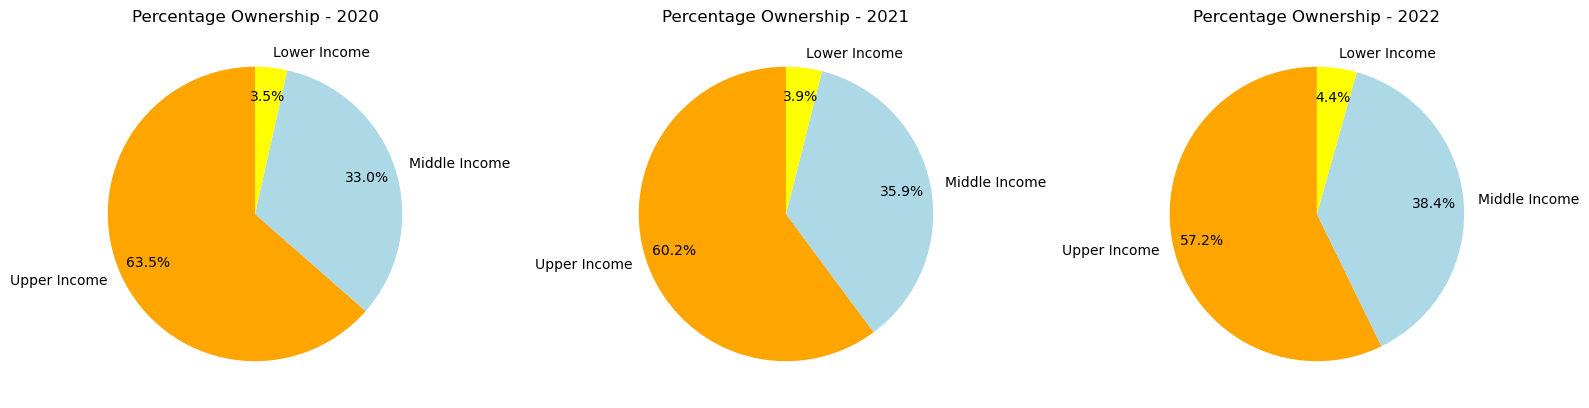

In [13]:
# Generate one pie chart for years 2020, 2021, and 2022 indicating percentage owning EVs per income level

income_level_labels = [
    'Upper Income', 'Middle Income', 'Lower Income'
]

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(16,16))

for i, year in enumerate(state_income_level_counts_df.index):
    state_income_level_counts_df.loc[year].plot.pie(ax=axes[i], 
                                                    colors=['orange', 'lightblue', 'yellow'], 
                                                    autopct='%.1f%%', 
                                                    pctdistance=.8, startangle=90)
    axes[i].set_title(f'Percentage Ownership - {year}')
    axes[i].set(ylabel="")

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

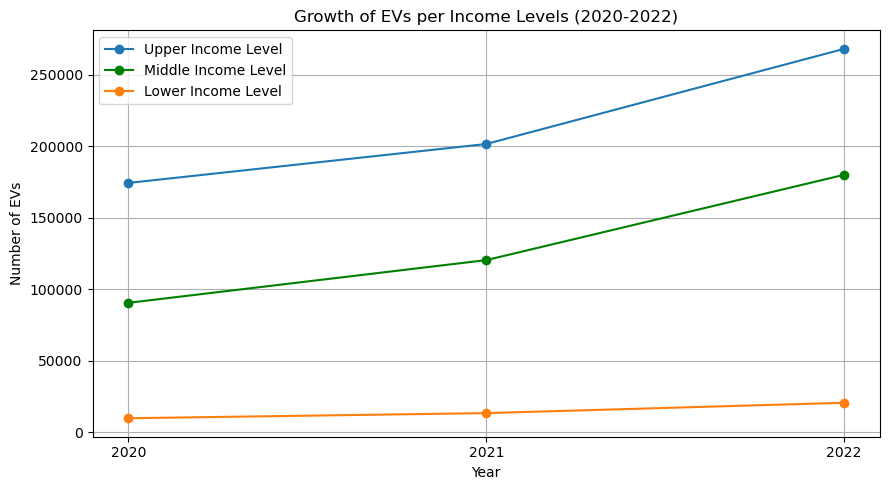

In [14]:
# Generate linear graph showing the trends of EV ownership per income level

Top = {
     'Upper 2020' : vehicle_count_in_state_df_2020_75,
     'Upper 2021' : vehicle_count_in_state_df_2021_75,   
     'Upper 2022' : vehicle_count_in_state_df_2022_75
}

Middle = {
     'Middle 2020' : total_vehicles_in_state_middle_income_2020, 
     'Middle 2021' : total_vehicles_in_state_middle_income_2021,   
     'Middle 2022' : total_vehicles_in_state_middle_income_2022
 }

Lower = {
     'Lower 2020' : vehicle_count_in_state_df_2020_25,
     'Lower 2021' : vehicle_count_in_state_df_2021_25,   
     'Lower 2022' : vehicle_count_in_state_df_2022_25
 }
    
year = ['2020','2021','2022']
vehicles_2020 = list(Top.values())
vehicles_2021 = list(Middle.values())
vehicles_2022 = list(Lower.values())

# Plotting
plt.figure(figsize=(9, 5))
plt.plot(year, vehicles_2020, label='Upper Income Level', marker='o')
plt.plot(year, vehicles_2021, label='Middle Income Level', color='green', marker='o')
plt.plot(year, vehicles_2022, label='Lower Income Level', marker='o')

# Customizing the plot
plt.xlabel('Year')
plt.ylabel('Number of EVs')
plt.title('Growth of EVs per Income Levels (2020-2022)')
plt.legend()
plt.grid(True)

#Show plot
plt.tight_layout()
plt.show()